#### Feature Selection with Mutual Information Score

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

#### Read the Dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train_titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Seperate X and Y 

In [9]:
x = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
y = df[['Survived']]

In [10]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### Seperate cat con Features

In [12]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [13]:
cat

['Sex', 'Cabin', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#### Create a simple SKlearn piplines for feature selection
1. Ordinal Encoding -Categorical Features

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [16]:
# Numerical pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipeline
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [17]:
x_pre = pre.fit_transform(x)
x_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  8.10000000e+01,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  6.00000000e+01,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  1.47000000e+02,  1.00000000e+00]])

In [18]:
cols = pre.get_feature_names_out()

In [19]:
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [20]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,1.0,147.0,2.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,30.0,2.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,147.0,2.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,1.0,60.0,0.0


#### Calculating Mutual Information Score

In [21]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre,y)
mi

array([0.04674516, 0.00884542, 0.02507461, 0.        , 0.14751817,
       0.14599946, 0.07787706, 0.02152048])

In [22]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__Fare        0.147518
cat__Sex         0.145999
cat__Cabin       0.077877
num__Pclass      0.046745
num__SibSp       0.025075
cat__Embarked    0.021520
num__Age         0.008845
num__Parch       0.000000
dtype: float64

<Axes: title={'center': 'Mutual Information Score'}>

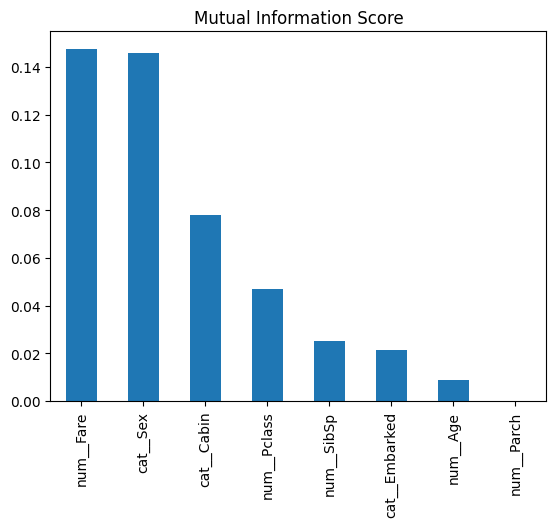

In [23]:
mi.plot(kind='bar',title='Mutual Information Score')

In [24]:
sel_cols = list(mi[0:6].index)
sel_cols

['num__Fare',
 'cat__Sex',
 'cat__Cabin',
 'num__Pclass',
 'num__SibSp',
 'cat__Embarked']

In [25]:
# Approach 2 for select top n features
from sklearn.feature_selection import SelectKBest,mutual_info_classif
sel = SelectKBest(mutual_info_classif,k=6)
sel_features = sel.fit_transform(x_pre,y)

In [26]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__SibSp', 'num__Fare', 'cat__Sex', 'cat__Cabin',
       'cat__Embarked'], dtype=object)

In [27]:
sel_cols[0].split('__')[1]

'Pclass'

In [28]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [29]:
imp_cols

['Pclass', 'SibSp', 'Fare', 'Sex', 'Cabin', 'Embarked']

In [30]:
x_sel = x[imp_cols]
x_sel

,Pclass,SibSp,Fare,Sex,Cabin,Embarked
0,3,1,7.2500,male,NaN,S
1,1,1,71.2833,female,C85,C
2,3,0,7.9250,female,NaN,S
3,1,1,53.1000,female,C123,S
4,3,0,8.0500,male,NaN,S
...,...,...,...,...,...,...
886,2,0,13.0000,male,NaN,S
887,1,0,30.0000,female,B42,S
888,3,1,23.4500,female,NaN,S
889,1,0,30.0000,male,C148,C


In [31]:
# Cat Con Seperation
cat_sel = list(x_sel.columns[x_sel.dtypes=='object'])
con_sel = list(x_sel.columns[x_sel.dtypes!='object'])

In [32]:
cat_sel

['Sex', 'Cabin', 'Embarked']

In [33]:
con_sel

['Pclass', 'SibSp', 'Fare']

#### Create a final pipeline

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
# Numerical pipeline
num_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical pipeline
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine cat and con pipeline
pre1 = ColumnTransformer([('num',num_pipe1,con_sel),
                         ('cat',cat_pipe1,cat_sel)])

In [36]:
x_sel_pre = pre1.fit_transform(x_sel).toarray()
x_sel_pre

array([[ 0.82737724,  0.43279337, -0.50244517, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.43279337,  0.78684529, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.48885426, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.43279337, -0.17626324, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.4745452 , -0.04438104, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.49237783, ...,  1.        ,
         0.        ,  0.        ]])

In [37]:
final_cols = pre1.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__SibSp', 'num__Fare', 'cat__Sex_female',
       'cat__Sex_male', 'cat__Cabin_A10', 'cat__Cabin_A14',
       'cat__Cabin_A16', 'cat__Cabin_A19', 'cat__Cabin_A20',
       'cat__Cabin_A23', 'cat__Cabin_A24', 'cat__Cabin_A26',
       'cat__Cabin_A31', 'cat__Cabin_A32', 'cat__Cabin_A34',
       'cat__Cabin_A36', 'cat__Cabin_A5', 'cat__Cabin_A6',
       'cat__Cabin_A7', 'cat__Cabin_B101', 'cat__Cabin_B102',
       'cat__Cabin_B18', 'cat__Cabin_B19', 'cat__Cabin_B20',
       'cat__Cabin_B22', 'cat__Cabin_B28', 'cat__Cabin_B3',
       'cat__Cabin_B30', 'cat__Cabin_B35', 'cat__Cabin_B37',
       'cat__Cabin_B38', 'cat__Cabin_B39', 'cat__Cabin_B4',
       'cat__Cabin_B41', 'cat__Cabin_B42', 'cat__Cabin_B49',
       'cat__Cabin_B5', 'cat__Cabin_B50', 'cat__Cabin_B51 B53 B55',
       'cat__Cabin_B57 B59 B63 B66', 'cat__Cabin_B58 B60',
       'cat__Cabin_B69', 'cat__Cabin_B71', 'cat__Cabin_B73',
       'cat__Cabin_B77', 'cat__Cabin_B78', 'cat__Cabin_B79',
       'cat__Cab

In [38]:
x_sel_pre = pd.DataFrame(x_sel_pre,columns=final_cols)
x_sel_pre

,num__Pclass,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,0.432793,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.566107,0.432793,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.827377,-0.474545,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.566107,0.432793,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.386671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,-1.566107,-0.474545,-0.044381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0.827377,0.432793,-0.176263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,-1.566107,-0.474545,-0.044381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_sel_pre,y,test_size=0.2,random_state=21)


#### Create a final model on Gradient Boost Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=21)

In [41]:
# Accuracy in Training
gbc.score(xtrain,ytrain)

0.8834269662921348

In [42]:
# Accuracy in Testing
gbc.score(xtest,ytest)

0.8212290502793296

#### Perform Hyperparameter Tuning

In [43]:
params = {'learning_rate': [0.01,0.05,0.1,0.2],
          'max_depth': [2,3,4,5,6,7,8],
          'min_samples_split':[2,3,4,5,6,7,8,9,10]}

In [44]:
from sklearn.model_selection import RandomizedSearchCV
base_gbc = GradientBoostingClassifier(random_state=21)
rscv = RandomizedSearchCV(base_gbc,param_distributions=params,cv=5,scoring='f1',random_state=21)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=21, scoring='f1')

In [45]:
rscv.best_params_

{'min_samples_split': 6, 'max_depth': 6, 'learning_rate': 0.2}

In [46]:
rscv.best_score_

0.7293847689960982

In [47]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, max_depth=6, min_samples_split=6,
                           random_state=21)

#### Evaluate the model

In [48]:
best_gbc.score(xtrain,ytrain)

0.9353932584269663

In [49]:
best_gbc.score(xtest,ytest)

0.8044692737430168

#### Predict Train Test Data


In [50]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [51]:
ypred_tr[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [52]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [53]:
ypred_ts[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [54]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


#### Confusion Matrix

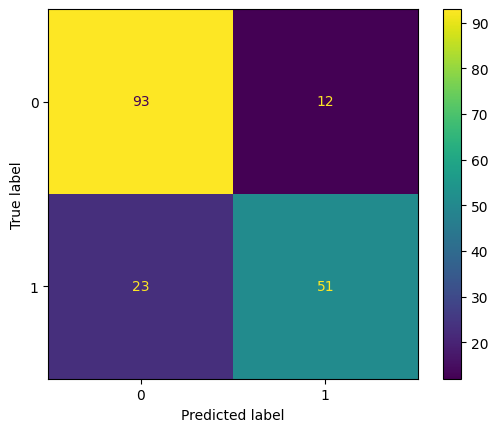

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()

#### Classification Report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Perform prediction on test_titanic data

In [57]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [59]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
xnew_pre = pre1.transform(xnew).toarray()
xnew_pre


array([[ 0.82737724, -0.4745452 , -0.49078316, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.43279337, -0.50747884, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36936484, -0.4745452 , -0.45336687, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82737724, -0.4745452 , -0.50244517, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.48633742, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  0.43279337, -0.19824428, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
xnew_pre =pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre

,num__Pclass,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,-0.474545,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.827377,0.432793,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.369365,-0.474545,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.827377,-0.474545,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.827377,0.432793,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
414,-1.566107,-0.474545,1.544246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,0.827377,-0.474545,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
416,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Perform predictions


In [62]:
pred = best_gbc.predict(xnew_pre)
pred[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [63]:
prob = best_gbc.predict_proba(xnew_pre)[:,1]
prob

array([0.13776839, 0.99507189, 0.08522443, 0.07642365, 0.48505187,
       0.04904274, 0.20137554, 0.19219081, 0.94447801, 0.04420408,
       0.04292004, 0.07953326, 0.98171571, 0.12544713, 0.98171571,
       0.95170406, 0.08958136, 0.15325614, 0.28432539, 0.94447801,
       0.13062005, 0.03996446, 0.96904713, 0.14098136, 0.99065567,
       0.38531273, 0.98674357, 0.15325614, 0.39985683, 0.06309722,
       0.12544713, 0.19375221, 0.8769012 , 0.09640975, 0.78956968,
       0.15325614, 0.1588895 , 0.12974466, 0.13796847, 0.86741594,
       0.15454193, 0.43622899, 0.10542545, 0.86945838, 0.99629465,
       0.25751485, 0.47199177, 0.08150932, 0.98674357, 0.97883048,
       0.28980017, 0.06986714, 0.92688281, 0.98884793, 0.1194372 ,
       0.04381276, 0.04292004, 0.0440447 , 0.16209315, 0.99113383,
       0.04292004, 0.08358309, 0.08399617, 0.78431612, 0.11709244,
       0.41856219, 0.9235434 , 0.12592793, 0.46190876, 0.98775042,
       0.75534639, 0.04292004, 0.39249866, 0.34791386, 0.99113

#### Save this values in dataframe

In [64]:
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [65]:
df_results['Survived'] = pred
df_results['Probability'] = prob

In [66]:
df_results

,PassengerId,Survived,Probability
0,892,0,0.137768
1,893,1,0.995072
2,894,0,0.085224
3,895,0,0.076424
4,896,0,0.485052
...,...,...,...
413,1305,0,0.098885
414,1306,1,0.986736
415,1307,0,0.031975
416,1308,0,0.098885


In [67]:
df_results['Survived'].value_counts()

Survived
0    289
1    129
Name: count, dtype: int64

<Axes: xlabel='Survived'>

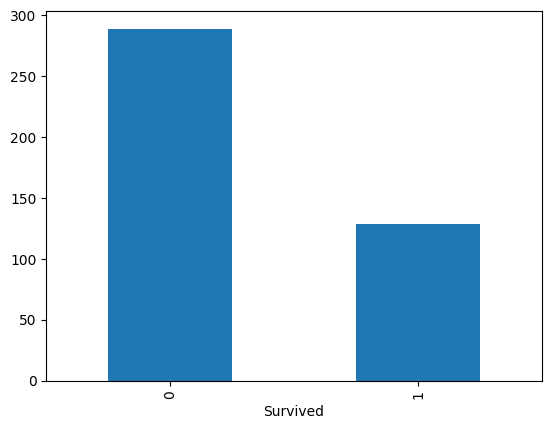

In [68]:
df_results['Survived'].value_counts().plot(kind='bar')

In [69]:
df_results.to_csv('Result.csv',index=False)